In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Spotify_Youtube.csv")


In [3]:
df.columns

Index(['Unnamed: 0', 'Artist', 'Url_spotify', 'Track', 'Album', 'Album_type',
       'Uri', 'Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness',
       'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo',
       'Duration_ms', 'Url_youtube', 'Title', 'Channel', 'Views', 'Likes',
       'Comments', 'Description', 'Licensed', 'official_video', 'Stream'],
      dtype='object')

In [4]:
df.drop(columns = ["Unnamed: 0",'Url_spotify','Uri','Url_youtube'],inplace = True)

In [5]:
df.columns

Index(['Artist', 'Track', 'Album', 'Album_type', 'Danceability', 'Energy',
       'Key', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness',
       'Liveness', 'Valence', 'Tempo', 'Duration_ms', 'Title', 'Channel',
       'Views', 'Likes', 'Comments', 'Description', 'Licensed',
       'official_video', 'Stream'],
      dtype='object')

In [6]:
df['Likes'] = df['Likes'].fillna(0)
df['Comments'] =df['Comments'].fillna(0)

In [7]:
missing = df.isna().any(axis = 1).sum()
total_row = len(df)
per = (missing/total_row)*100
print(f"{per:.2f}")

6.85


In [8]:
df.dropna(inplace = True)
df.isna().sum()

Artist              0
Track               0
Album               0
Album_type          0
Danceability        0
Energy              0
Key                 0
Loudness            0
Speechiness         0
Acousticness        0
Instrumentalness    0
Liveness            0
Valence             0
Tempo               0
Duration_ms         0
Title               0
Channel             0
Views               0
Likes               0
Comments            0
Description         0
Licensed            0
official_video      0
Stream              0
dtype: int64

### Upper look or Instance view
- There are minimul missing value
- There are some missing values in Likes and Comments which is considered as Zero.
- only about 6 percent of the rows values are missing which can be droped

## Question answer
### Question 1
###### Top 10 artist who have top views

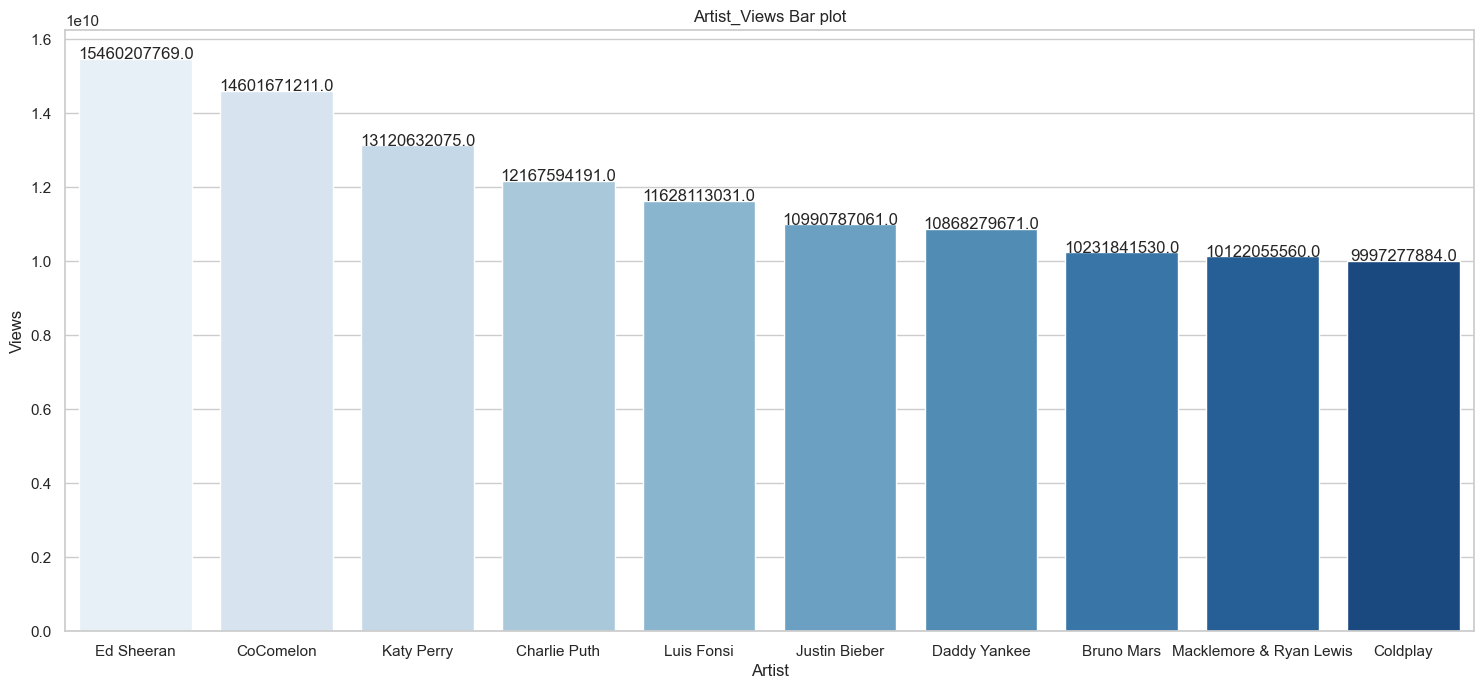

In [76]:
art_view = df.groupby("Artist")["Views"].sum()
art_view.sort_values(ascending = False,inplace = True)
art_view = art_view.head(10)

art = art_view.reset_index() #Convert pandas series to a dataframe

sns.set(style = "whitegrid")
plt.figure(figsize=(15, 7))

sns.barplot(x = "Artist",
            y = 'Views',
            data = art,
           palette='Blues')

for i,value in enumerate(art["Views"]):           #Adding value on the top of the bars
    plt.text(i,value+10000,value,ha = 'center')
    
plt.tight_layout()
plt.title("Artist_Views Bar plot")
plt.show()

#### Observesion
- Top 3 artists are Ed Sheeran, CoComelon ,Katy Perry

### Question 2
- Top 10 Tracks on Spotify with highest streams

In [10]:
trk_str = df[["Track","Stream"]]
trk_str.sort_values(by = ["Stream"],ascending = False,inplace = True)
trk_str.head(10)
trk_str[:5]

,Track,Stream
15250,Blinding Lights,3.386520e+09
12452,Shape of You,3.362005e+09
19186,Someone You Loved,2.634013e+09
17937,rockstar (feat. 21 Savage),2.594927e+09
17938,Sunflower - Spider-Man: Into the Spider-Verse,2.538330e+09


#### Observesion
- Top 3 Track are Blinding Lights	, Shape of You ,Someone You Loved

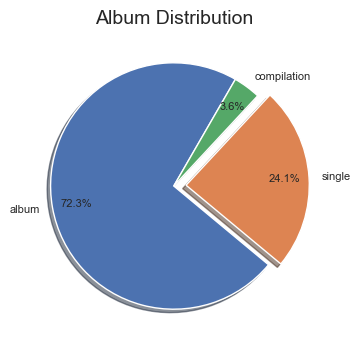

In [66]:
alb = df.value_counts(df["Album_type"]).reset_index()
plt.figure(figsize=(4,4))
plt.pie(alb["count"],
        labels= alb["Album_type"],
        autopct = '%1.1f%%',
        pctdistance=0.8,
        startangle = 60,
        shadow=True,
       explode=[0,0.1,0],
       textprops={'fontsize': 8})
plt.title("Album Distribution",fontsize=14)
plt.show()

In [14]:
df.columns

Index(['Artist', 'Track', 'Album', 'Album_type', 'Danceability', 'Energy',
       'Key', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness',
       'Liveness', 'Valence', 'Tempo', 'Duration_ms', 'Title', 'Channel',
       'Views', 'Likes', 'Comments', 'Description', 'Licensed',
       'official_video', 'Stream'],
      dtype='object')

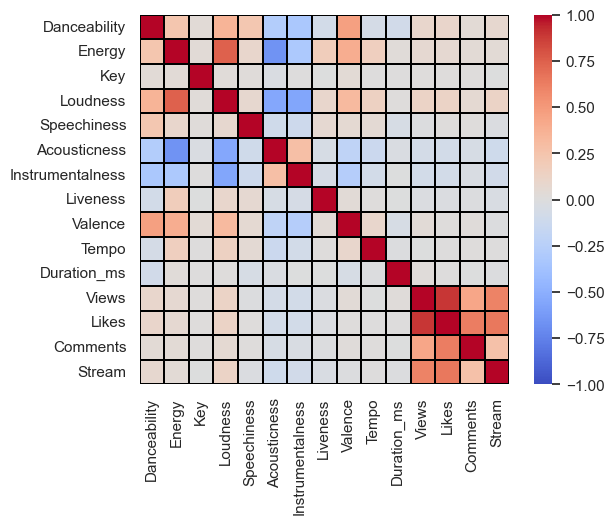

In [64]:
data = df.select_dtypes("number")
corr = data.corr()
sns.heatmap(corr,
            vmin = -1, 
            cmap='coolwarm',
            square = True,
            linewidths=0.1,
            linecolor='black'
           )
plt.show()

In [35]:
df.columns

Index(['Artist', 'Track', 'Album', 'Album_type', 'Danceability', 'Energy',
       'Key', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness',
       'Liveness', 'Valence', 'Tempo', 'Duration_ms', 'Title', 'Channel',
       'Views', 'Likes', 'Comments', 'Description', 'Licensed',
       'official_video', 'Stream'],
      dtype='object')

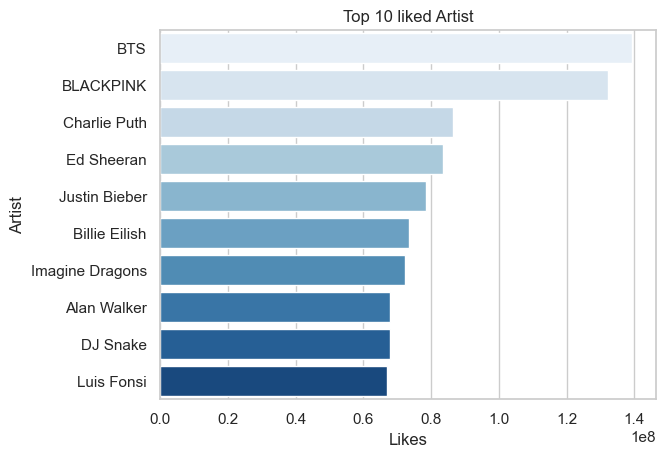

In [93]:
data = df.groupby("Artist")['Likes'].sum()
data = data.reset_index()
data.sort_values(by = 'Likes',ascending =False,inplace =True)
d = data.head(10)
sn = sns.barplot(x = 'Likes',y = 'Artist',data = d,palette="Blues")
sn.set(title = 'Top 10 liked Artist')
plt.show()

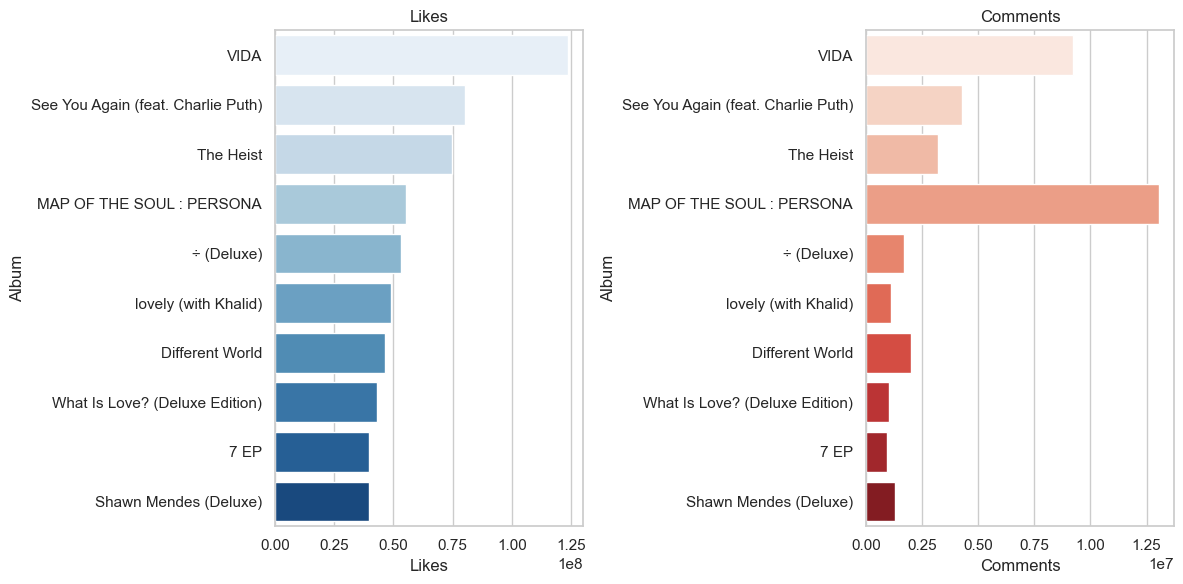

In [127]:

d = df.groupby('Album')[["Likes", "Comments"]].sum().reset_index()
d.sort_values(by = ['Likes','Comments'],ascending = False,inplace  = True)
d = d.head(10)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

sns.barplot(x='Likes', y='Album', data=d, ax=ax1, palette='Blues')
ax1.set_title('Likes')

sns.barplot(x='Comments', y='Album', data=d, ax=ax2, palette='Reds')
ax2.set_title('Comments')

plt.tight_layout()